# Importing the Libraries 

In [98]:
import pandas as pd
import numpy as np
import time
from timeit import default_timer as timer
import matplotlib.pyplot as plt
import requests
import tweepy
import warnings
import os
import json
import re
from tweepy import OAuthHandler

# Gathering Data #1

## Load Twitter Archive

In [3]:
Twitter_Archive = pd.read_csv('twitter-archive-enhanced.csv')

In [6]:
Twitter_Archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [7]:
Twitter_Archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

## Twitter TSV File 

In [8]:

url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv' 
response = requests.get(url)

with open(os.path.join('image_predictions.tsv'), 'wb') as file:
    file.write(response.content)
     
Image_pred = pd.read_csv('image_predictions.tsv', sep = '\t', encoding = 'utf-8')
Image_pred.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


## The Twitter API Data

In [15]:

# NOTE TO REVIEWER: this student had mobile verification issues so the following
# Twitter API code was sent to this student from a Udacity instructor

df_list = []

with open('tweet-json.txt', 'r', encoding='utf8') as f:
    for line in f:
        tweet_line = json.loads(line)
        df_list.append({'tweet_id': tweet_line['id'],
                        'favorites': tweet_line['favorite_count'],
                        'retweets': tweet_line['retweet_count']})
        
twitter_api = pd.DataFrame(df_list)
twitter_api.head()

,favorites,retweets,tweet_id
0,39467,8853,892420643555336193
1,33819,6514,892177421306343426
2,25461,4328,891815181378084864
3,42908,8964,891689557279858688
4,41048,9774,891327558926688256


In [ ]:

#Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
#These are hidden to comply with Twitter's API terms and conditions
consumer_key = 'HIDDEN'
consumer_secret = 'HIDDEN'
access_token = 'HIDDEN'
access_secret = 'HIDDEN'

auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=Tmcrue)

#NOTE TO STUDENT WITH MOBILE VERIFICATION ISSUES:
#df_1 is a DataFrame with the twitter_archive_enhanced.csv file. You may have to
#change line 17 to match the name of your DataFrame with twitter_archive_enhanced.csv
#NOTE TO REVIEWER: this student had mobile verification issues so the following
#Twitter API code was sent to this student from a Udacity instructor
#Tweet IDs for which to gather additional data via Twitter's API
tweet_ids = df_1.tweet_id.values
len(tweet_ids)

#Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
fails_dict = {}
start = timer()
#Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as outfile:
     #This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepError as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)

# Assessing Data #2

## #1 Visual Assessment 

 - Twitter Archive

In [40]:
Twitter_Archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


## The file contain 2356 Rows and 17 Columns

 - **Tweet_ID**: Unique Identifier
 - **in_reply_to_status_id**: if the tweet is a reply tweet then the value will be an integer of the id
 - **in_reply_to_user_id**:  if the tweet is a reply tweet then the value will be an integer of the original Tweet’s author id
 - **timestamp**: is the time of tweet was published
 - **source**: the source of the tweet 
 - **text**: the original text of the tweet
 - **retweeted_status_id**: this field shows the original tweet that was retweeted
 - **retweeted_status_user_id**: this field shows the original tweet that was retweeted of the actual user
 - **retweeted_status_timestamp**: the time of the original tweet that was retweeted
 - **expanded_urls**: The URL of the tweet
 - **rating_numerator**: The top number of a fraction
 - **rating_denominator**: The bottom number of a fraction
 - **name**: The name of the Dog
 - **doggo/floofer/pupper/puppo**: is The Dog ages and Levels

- Twitter TSV File 

In [13]:
Image_pred.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


## The file contain 2075 Rows and 12 Columns

- **tweet_id**: The last part of the tweet URL 
- **jpg_URL**: The image of the tweet
- **img_num**: Twitter let you have 1 to 4 images per tweet so this number represent how many imeges
- **p1**: Algorithm's #1 prediction for the image in the tweet → golden retriever
- **p1_conf**: How confident the algorithm is in its #1 prediction → 95%
- **p1_dog**: Whether or not the #1 prediction is a breed of dog → TRUE
- **p2**: Algorithm's second most likely prediction → Labrador retriever
- **p2_conf**: How confident the algorithm is in its #2 prediction → 1%
- **p2_dog**: Whether or not the #2 prediction is a breed of dog → TRUE

- The Twitter API Data

In [18]:
twitter_api.head()

,favorites,retweets,tweet_id
0,39467,8853,892420643555336193
1,33819,6514,892177421306343426
2,25461,4328,891815181378084864
3,42908,8964,891689557279858688
4,41048,9774,891327558926688256


## The file contain 2354 Rows and 3 Columns

- **favorites**: how many likes ?
- **retweets**: how many retweets of the tweet
- **tweet_id** : Unique Identifier

## #2 Programmatic Assessment 

 - Twitter Archive

In [69]:
Twitter_Archive.head(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [20]:
Twitter_Archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [22]:
Twitter_Archive.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [23]:
Twitter_Archive.sample(9)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1064,740995100998766593,NaN,NaN,2016-06-09 19:52:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Leo. He's a vape god. Blows o's for da...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/740995100...,10,10,Leo,None,None,None,None
1504,691820333922455552,NaN,NaN,2016-01-26 03:09:55 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Brockly. He's an uber driver. Falls as...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/691820333...,8,10,Brockly,None,None,None,None
1390,700151421916807169,NaN,NaN,2016-02-18 02:54:41 +0000,"<a href=""http://twitter.com/download/iphone"" r...",If a pupper gave that to me I'd probably start...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/700151421...,11,10,None,None,None,pupper,None
1417,698549713696649216,NaN,NaN,2016-02-13 16:50:04 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Claude. He's trying to be seductive bu...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/698549713...,9,10,Claude,None,None,None,None
2212,668587383441514497,NaN,NaN,2015-11-23 00:30:28 +0000,"<a href=""http://vine.co"" rel=""nofollow"">Vine -...",Never forget this vine. You will not stop watc...,NaN,NaN,NaN,https://vine.co/v/ea0OwvPTx9l,13,10,the,None,None,None,None
698,786363235746385920,NaN,NaN,2016-10-13 00:29:39 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Rizzo. He has many talents. A true ren...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/786363235...,13,10,Rizzo,doggo,None,None,None
1828,676263575653122048,NaN,NaN,2015-12-14 04:52:55 +0000,"<a href=""http://twitter.com/download/iphone"" r...",All this pupper wanted to do was go skiing. No...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/676263575...,10,10,None,None,None,pupper,None
1697,681231109724700672,NaN,NaN,2015-12-27 21:52:07 +0000,"<a href=""http://twitter.com/download/iphone"" r...",I just love this pic. 11/10 this pupper is goi...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/681231109...,11,10,None,None,None,pupper,None
2179,669006782128353280,NaN,NaN,2015-11-24 04:17:01 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tucker. He is 100% ready for the sport...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/669006782...,12,10,Tucker,None,None,None,None


In [31]:
# tweets without image
Twitter_Archive['expanded_urls'].isnull().value_counts()

False    2297
True       59
Name: expanded_urls, dtype: int64

In [33]:
# The names of the dogs in lower case 
Twitter_Archive.loc[(Twitter_Archive.name.str.islower())]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
22,887517139158093824,NaN,NaN,2017-07-19 03:39:09 +0000,"<a href=""http://twitter.com/download/iphone"" r...",I've yet to rate a Venezuelan Hover Wiener. Th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/887517139...,14,10,such,None,None,None,None
56,881536004380872706,NaN,NaN,2017-07-02 15:32:16 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a pupper approaching maximum borkdrive...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/881536004...,14,10,a,None,None,pupper,None
118,869988702071779329,NaN,NaN,2017-05-31 18:47:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: We only rate dogs. This is quit...,8.591970e+17,4.196984e+09,2017-05-02 00:04:57 +0000,https://twitter.com/dog_rates/status/859196978...,12,10,quite,None,None,None,None
169,859196978902773760,NaN,NaN,2017-05-02 00:04:57 +0000,"<a href=""http://twitter.com/download/iphone"" r...",We only rate dogs. This is quite clearly a smo...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/859196978...,12,10,quite,None,None,None,None
193,855459453768019968,NaN,NaN,2017-04-21 16:33:22 +0000,"<a href=""http://twitter.com/download/iphone"" r...","Guys, we only rate dogs. This is quite clearly...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/855459453...,12,10,quite,None,None,None,None
335,832645525019123713,NaN,NaN,2017-02-17 17:38:57 +0000,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",There's going to be a dog terminal at JFK Airp...,NaN,NaN,NaN,http://us.blastingnews.com/news/2017/02/jfk-an...,10,10,not,None,None,None,None
369,828650029636317184,NaN,NaN,2017-02-06 17:02:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...","Occasionally, we're sent fantastic stories. Th...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/828650029...,14,10,one,None,None,None,None
542,806219024703037440,NaN,NaN,2016-12-06 19:29:28 +0000,"<a href=""http://twitter.com/download/iphone"" r...",We only rate dogs. Please stop sending in non-...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/806219024...,11,10,incredibly,None,None,None,None
649,792913359805018113,NaN,NaN,2016-10-31 02:17:31 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a perfect example of someone who has t...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/792913359...,13,10,a,None,None,None,None
682,788552643979468800,NaN,NaN,2016-10-19 01:29:35 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Say hello to mad pupper. You kn...,7.363926e+17,4.196984e+09,2016-05-28 03:04:00 +0000,"https://vine.co/v/iEggaEOiLO3,https://vine.co/...",13,10,mad,None,None,pupper,None


- Twitter TSV File 

In [41]:
Image_pred.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [34]:
Image_pred.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [43]:
Image_pred.sample(9)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1616,802265048156610565,https://pbs.twimg.com/media/CyI3zXgWEAACQfB.jpg,1,Labrador_retriever,0.897162,True,beagle,0.016895,True,Rhodesian_ridgeback,0.012061,True
1493,783085703974514689,https://pbs.twimg.com/media/Ct4URfWUAAQ7lKe.jpg,1,Chesapeake_Bay_retriever,0.240602,True,Airedale,0.164088,True,boxer,0.134506,True
1950,863079547188785154,https://pbs.twimg.com/media/C_pGRInUwAAmTY_.jpg,1,Lakeland_terrier,0.275242,True,Airedale,0.190569,True,teddy,0.102595,False
1977,870374049280663552,https://pbs.twimg.com/media/DBQwlFCXkAACSkI.jpg,1,golden_retriever,0.841001,True,Great_Pyrenees,0.099278,True,Labrador_retriever,0.032621,True
713,685325112850124800,https://pbs.twimg.com/media/CYLDikFWEAAIy1y.jpg,1,golden_retriever,0.586937,True,Labrador_retriever,0.398260,True,kuvasz,0.005410,True
2007,877736472329191424,https://pbs.twimg.com/media/DC5YqoQW0AArOLH.jpg,2,Chesapeake_Bay_retriever,0.837956,True,Labrador_retriever,0.062034,True,Weimaraner,0.040599,True
450,674739953134403584,https://pbs.twimg.com/media/CV0oaHFW4AA9Coi.jpg,1,Dandie_Dinmont,0.175915,True,black-footed_ferret,0.096534,False,toy_poodle,0.064145,True
337,672231046314901505,https://pbs.twimg.com/media/CVQ-kfWWoAAXV15.jpg,1,killer_whale,0.823919,False,grey_whale,0.036601,False,hammerhead,0.029522,False
430,674269164442398721,https://pbs.twimg.com/media/CVt8OmIWIAAbxvJ.jpg,1,pug,0.622921,True,Norwegian_elkhound,0.048659,True,Cardigan,0.016966,True


- The Twitter API Data

In [44]:
twitter_api.head()

,favorites,retweets,tweet_id
0,39467,8853,892420643555336193
1,33819,6514,892177421306343426
2,25461,4328,891815181378084864
3,42908,8964,891689557279858688
4,41048,9774,891327558926688256


In [36]:
twitter_api.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
favorites    2354 non-null int64
retweets     2354 non-null int64
tweet_id     2354 non-null int64
dtypes: int64(3)
memory usage: 55.2 KB


In [45]:
twitter_api.sample(9)

,favorites,retweets,tweet_id
1162,5761,2110,723179728551723008
500,11694,4207,813096984823349248
1317,3404,1150,706516534877929472
1740,34856,21324,679462823135686656
2281,658,282,667200525029539841
1847,1750,537,675781562965868544
70,19763,4319,878776093423087618
1611,3676,1234,685315239903100929
863,5350,1298,762316489655476224


## Issues That i found :

## Quality Issues :

- Dogs Names need correction
- Missing Values in Dogs Levels ( None )
- Creating a new coulmn called Rating 
- drop the (rating_numerator, rating_denominator) columns
- Some tweets dont have images
- dog_level, img_num, source need to be converted to Category
- TimeStamp need to be converted to DateTime
- git rid of the html tags from the SOURCE
- There are more than one coulmns to drop.
- Retweets need to be removed

## Tidiness Issues :

- merging the three dataframes into one using the tweet_id as a primary key 
- The ( doggo/floofer/pupper/puppo ) we can just make it one column 

# Cleaning Data #3

### First we will make a copy of the DataFrames

In [46]:
df_clean1 = Twitter_Archive.copy()
df_clean2 = Image_pred.copy()
df_clean3 = twitter_api.copy()

## we will work on the Tidiness Issues First

### #1 Issue: Merging the Dataframes

**Define** 

- Merging the three DataFrames into one Using .merge()

**Code**

In [49]:
# Merging the first and third dataframe
df_temp = pd.merge(df_clean1, df_clean3, left_on = 'tweet_id', right_on = 'tweet_id', how = 'inner')

# Merging the df_temp with the second (Image_pred)
df_All = pd.merge(df_temp, df_clean2, left_on = 'tweet_id', right_on = 'tweet_id', how = 'inner')

**test**

In [50]:
df_All.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2073 entries, 0 to 2072
Data columns (total 30 columns):
tweet_id                      2073 non-null int64
in_reply_to_status_id         23 non-null float64
in_reply_to_user_id           23 non-null float64
timestamp                     2073 non-null object
source                        2073 non-null object
text                          2073 non-null object
retweeted_status_id           79 non-null float64
retweeted_status_user_id      79 non-null float64
retweeted_status_timestamp    79 non-null object
expanded_urls                 2073 non-null object
rating_numerator              2073 non-null int64
rating_denominator            2073 non-null int64
name                          2073 non-null object
doggo                         2073 non-null object
floofer                       2073 non-null object
pupper                        2073 non-null object
puppo                         2073 non-null object
favorites                     2073 

In [51]:
df_All.to_csv('Twitter_archive_ALL.csv', index=False)

In [52]:
all_archive = pd.read_csv('Twitter_archive_ALL.csv')

In [54]:
all_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2073 entries, 0 to 2072
Data columns (total 30 columns):
tweet_id                      2073 non-null int64
in_reply_to_status_id         23 non-null float64
in_reply_to_user_id           23 non-null float64
timestamp                     2073 non-null object
source                        2073 non-null object
text                          2073 non-null object
retweeted_status_id           79 non-null float64
retweeted_status_user_id      79 non-null float64
retweeted_status_timestamp    79 non-null object
expanded_urls                 2073 non-null object
rating_numerator              2073 non-null int64
rating_denominator            2073 non-null int64
name                          2073 non-null object
doggo                         2073 non-null object
floofer                       2073 non-null object
pupper                        2073 non-null object
puppo                         2073 non-null object
favorites                     2073 

### #2 Issue: Merging the dogs levels ( doggo, floofer, pupper, puppo)

**define**

## Merging the dogs levels Using str.extract

**Code**

In [55]:
# Creating and merging dog Levels into one column.
all_archive['dog_level'] = all_archive.text.str.extract('(doggo|floofer|pupper|puppo)', expand = True)

# Drop the columns that we dont need any more
all_archive.drop(['doggo','floofer','pupper','puppo'], axis=1, inplace = True)

**test**

In [56]:
all_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2073 entries, 0 to 2072
Data columns (total 27 columns):
tweet_id                      2073 non-null int64
in_reply_to_status_id         23 non-null float64
in_reply_to_user_id           23 non-null float64
timestamp                     2073 non-null object
source                        2073 non-null object
text                          2073 non-null object
retweeted_status_id           79 non-null float64
retweeted_status_user_id      79 non-null float64
retweeted_status_timestamp    79 non-null object
expanded_urls                 2073 non-null object
rating_numerator              2073 non-null int64
rating_denominator            2073 non-null int64
name                          2073 non-null object
favorites                     2073 non-null int64
retweets                      2073 non-null int64
jpg_url                       2073 non-null object
img_num                       2073 non-null int64
p1                            2073 non

In [59]:
all_archive.sample(9)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,dog_level
701,762316489655476224,NaN,NaN,2016-08-07 15:56:28 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Scout. He specializes in mid-air freez...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/762316489...,...,African_grey,0.270468,False,Madagascar_cat,0.076187,False,television,0.033306,False,NaN
2013,667119796878725120,NaN,NaN,2015-11-18 23:18:48 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Gabe. He is a southern Baklava. Gabe h...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/667119796...,...,Pembroke,0.741563,True,Chihuahua,0.057866,True,toy_poodle,0.039125,True,NaN
267,832369877331693569,NaN,NaN,2017-02-16 23:23:38 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Charlie. He fell asleep on a heating v...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/832369877...,...,kelpie,0.504690,True,German_short-haired_pointer,0.105208,True,Staffordshire_bullterrier,0.054338,True,NaN
114,865718153858494464,NaN,NaN,2017-05-19 23:57:46 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Boomer. He's just checking pup on you. Ho...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/865718153...,...,golden_retriever,0.673664,True,kuvasz,0.157523,True,Labrador_retriever,0.126073,True,NaN
1395,683481228088049664,NaN,NaN,2016-01-03 02:53:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Banjo. He's a Peppercorn Shoop Da Whoop. ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/683481228...,...,keeshond,0.508951,True,chow,0.442016,True,German_shepherd,0.013206,True,pupper
1869,669749430875258880,NaN,NaN,2015-11-26 05:28:02 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to Clarence. Clarence thought he saw...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/669749430...,...,washbasin,0.245794,False,toilet_seat,0.109420,False,paper_towel,0.105664,False,NaN
1076,708349470027751425,NaN,NaN,2016-03-11 17:50:48 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is River. He's changing the trumpet game....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/708349470...,...,muzzle,0.243890,False,basenji,0.187158,True,Boston_bull,0.092727,True,NaN
812,748705597323898880,NaN,NaN,2016-07-01 02:31:39 +0000,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",#BarkWeek is getting rather heckin terrifying ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/748705597...,...,tiger_shark,0.548497,False,great_white_shark,0.130252,False,scuba_diver,0.121887,False,NaN
1475,679530280114372609,NaN,NaN,2015-12-23 05:13:38 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Guys this really needs to stop. We've been ove...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/679530280...,...,dalmatian,0.750256,True,jaguar,0.169007,False,zebra,0.006481,False,NaN


### #3 Issue: Drop The unnecessary coulmns

**define**

## Drop the unnecessary coulmns using .drop

**code**

## I already drop them so if i run it, it will show errors

In [116]:
#all_archive.drop(['p1_conf','p1_dog', 'p2_conf','p2_dog', 'p3_conf','p3_dog','in_reply_to_status_id','in_reply_to_user_id','retweeted_status_id','retweeted_status_user_id','retweeted_status_timestamp'], axis=1, inplace=True)

**Test**

In [61]:
all_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2073 entries, 0 to 2072
Data columns (total 16 columns):
tweet_id              2073 non-null int64
timestamp             2073 non-null object
source                2073 non-null object
text                  2073 non-null object
expanded_urls         2073 non-null object
rating_numerator      2073 non-null int64
rating_denominator    2073 non-null int64
name                  2073 non-null object
favorites             2073 non-null int64
retweets              2073 non-null int64
jpg_url               2073 non-null object
img_num               2073 non-null int64
p1                    2073 non-null object
p2                    2073 non-null object
p3                    2073 non-null object
dog_level             337 non-null object
dtypes: int64(6), object(10)
memory usage: 259.2+ KB


## And here we are finished with the tidiness and now work on the quality

## Quality Issues

### #1 Issue: Missing Values in Dogs Levels ( None )

**Define**

- i'll replace every NaN With None

**Code**

In [62]:
type_level = ['dog_level']

for dog_level in type_level:
    all_archive.loc[all_archive[dog_level] == 'None', dog_level] = None

**Test**

In [66]:
all_archive.dog_level.value_counts()

pupper     230
doggo       75
puppo       29
floofer      3
Name: dog_level, dtype: int64

### #2 Issue: Dogs Names need correction

**Define**

- i'll replace the not real names 

**Code**

In [81]:
Dogs_Names = ['a','the','this','an','None','such','not','very','my','just','quit']

for namme in Dogs_Names:
    all_archive.loc[all_archive.name == namme, 'name'] = None

**Test**

In [82]:
all_archive.name.value_counts()

Charlie       11
Cooper        10
Penny         10
Tucker        10
Lucy          10
Oliver        10
Bo             8
Lola           8
Winston        8
Sadie          8
Toby           7
Daisy          7
Rusty          6
Bella          6
Milo           6
Stanley        6
Bailey         6
Jax            6
Dave           6
Scout          6
Koda           6
Leo            5
Oscar          5
Larry          5
Louis          5
Buddy          5
Chester        5
Alfie          5
Jack           4
Gary           4
              ..
Newt           1
Pubert         1
Finnegus       1
Olaf           1
Link           1
Scruffers      1
Bonaparte      1
Karma          1
Strudel        1
Longfellow     1
Philbert       1
Ronnie         1
Nollie         1
Thor           1
Rambo          1
Mabel          1
Rooney         1
Jerome         1
Pilot          1
Dutch          1
Hanz           1
Spark          1
Reagan         1
Shnuggles      1
Todo           1
Dawn           1
Rinna          1
Laika         

### #3 Issue: Creating a new coulmn called Rating 

**Define**

- Creating a rating coulmn

**Code**

In [85]:
rate = all_archive.text.str.extract('(\d+(\.\d+)*\/\d+)')
all_archive['rate'] = rate[0]

**Test**

In [87]:
all_archive.head()

,tweet_id,timestamp,source,text,expanded_urls,name,favorites,retweets,jpg_url,img_num,p1,p2,p3,dog_level,rate
0,892420643555336193,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,Phineas,39467,8853,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,orange,bagel,banana,NaN,13/10
1,892177421306343426,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,Tilly,33819,6514,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,Pekinese,papillon,NaN,13/10
2,891815181378084864,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,Archie,25461,4328,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,malamute,kelpie,NaN,12/10
3,891689557279858688,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,Darla,42908,8964,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,Labrador_retriever,spatula,NaN,13/10
4,891327558926688256,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,Franklin,41048,9774,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,English_springer,German_short-haired_pointer,NaN,12/10


In [88]:
all_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2073 entries, 0 to 2072
Data columns (total 15 columns):
tweet_id         2073 non-null int64
timestamp        2073 non-null object
source           2073 non-null object
text             2073 non-null object
expanded_urls    2073 non-null object
name             1415 non-null object
favorites        2073 non-null int64
retweets         2073 non-null int64
jpg_url          2073 non-null object
img_num          2073 non-null int64
p1               2073 non-null object
p2               2073 non-null object
p3               2073 non-null object
dog_level        337 non-null object
rate             2073 non-null object
dtypes: int64(4), object(11)
memory usage: 243.0+ KB


### #4 Issue: Drop the (rating_numerator, rating_denominator) columns

**Define**

- drop the (rating_numerator, rating_denominator) columns

**Code**

## I already drop them so if i run it, it will show errors

In [117]:
#all_archive.drop(['rating_numerator', 'rating_denominator'], axis=1, inplace=True)

**Test**

In [101]:
all_archive.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2073 entries, 0 to 2072
Data columns (total 15 columns):
tweet_id         2073 non-null int64
timestamp        2073 non-null datetime64[ns, UTC]
source           2073 non-null category
text             2073 non-null object
expanded_urls    2073 non-null object
name             1415 non-null object
favorites        2073 non-null int64
retweets         2073 non-null int64
jpg_url          2073 non-null object
img_num          2073 non-null category
p1               2073 non-null object
p2               2073 non-null object
p3               2073 non-null object
dog_level        337 non-null category
rate             2073 non-null object
dtypes: category(3), datetime64[ns, UTC](1), int64(3), object(8)
memory usage: 217.1+ KB


### #5 Issue: Some tweets dont have images

**Define**

- Drop all of the tweets that dont have a pictures

**Code**

In [93]:
all_archive = all_archive.dropna(subset=['expanded_urls'])

**Test**

In [94]:
all_archive['expanded_urls'].isnull().value_counts()

False    2073
Name: expanded_urls, dtype: int64

### #6 Issue: (dog_level, img_num, source) need to be converted to Category

**Define**

- dog_level, source, img_num to catogry 

**Code**

In [96]:
all_archive['dog_level'] = all_archive['dog_level'].astype('category')
all_archive['img_num'] = all_archive['img_num'].astype('category')
all_archive['source'] = all_archive['source'].astype('category')

**Test**

In [97]:
all_archive.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2073 entries, 0 to 2072
Data columns (total 15 columns):
tweet_id         2073 non-null int64
timestamp        2073 non-null datetime64[ns, UTC]
source           2073 non-null category
text             2073 non-null object
expanded_urls    2073 non-null object
name             1415 non-null object
favorites        2073 non-null int64
retweets         2073 non-null int64
jpg_url          2073 non-null object
img_num          2073 non-null category
p1               2073 non-null object
p2               2073 non-null object
p3               2073 non-null object
dog_level        337 non-null category
rate             2073 non-null object
dtypes: category(3), datetime64[ns, UTC](1), int64(3), object(8)
memory usage: 217.1+ KB


### #7 Issue: TimeStamp need to be converted to DateTime

**Define**

- timestamp to datetime 

**Code**

In [ ]:
all_archive['timestamp'] = pd.to_datetime(all_archive['timestamp'])

**Test**

In [103]:
all_archive.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2073 entries, 0 to 2072
Data columns (total 15 columns):
tweet_id         2073 non-null int64
timestamp        2073 non-null datetime64[ns, UTC]
source           2073 non-null category
text             2073 non-null object
expanded_urls    2073 non-null object
name             1415 non-null object
favorites        2073 non-null int64
retweets         2073 non-null int64
jpg_url          2073 non-null object
img_num          2073 non-null category
p1               2073 non-null object
p2               2073 non-null object
p3               2073 non-null object
dog_level        337 non-null category
rate             2073 non-null object
dtypes: category(3), datetime64[ns, UTC](1), int64(3), object(8)
memory usage: 217.1+ KB


### #8 Issue: git rid of the html tags from the SOURCE

**Define**

- delet the tags from the source 

**Code**

In [107]:
import re

html_tags = re.compile(r'<[^>]+>')

def remove_tags(text):
    return html_tags.sub('', text)

all_archive['source'] = all_archive['source'].apply(remove_tags)

**Test**

In [108]:
all_archive.source.value_counts()

Twitter for iPhone    2032
Twitter Web Client      30
TweetDeck               11
Name: source, dtype: int64

### #9 Issue: Retweets need to be removed

**Define**

- get rid of the retweets

**code**

In [118]:
all_archive.loc[all_archive['text'].str.startswith('RT') != False]

,tweet_id,timestamp,source,text,expanded_urls,name,favorites,retweets,jpg_url,img_num,p1,p2,p3,dog_level,rate
32,885311592912609280,2017-07-13 01:35:06+00:00,Twitter for iPhone,RT @dog_rates: This is Lilly. She just paralle...,https://twitter.com/dog_rates/status/830583320...,Lilly,0,19297,https://pbs.twimg.com/media/C4bTH6nWMAAX_bJ.jpg,1,Labrador_retriever,seat_belt,pug,NaN,13/10
67,877611172832227328,2017-06-21 19:36:23+00:00,Twitter for iPhone,RT @rachel2195: @dog_rates the boyfriend and h...,https://twitter.com/rachel2195/status/87685077...,None,0,83,https://pbs.twimg.com/media/DCszHgmW0AAmIpT.jpg,1,Irish_setter,golden_retriever,Irish_terrier,pupper,14/10
81,873697596434513921,2017-06-11 00:25:14+00:00,Twitter for iPhone,RT @dog_rates: This is Walter. He won't start ...,https://twitter.com/dog_rates/status/868880397...,Walter,0,12518,https://pbs.twimg.com/media/DA7iHL5U0AA1OQo.jpg,1,laptop,French_bulldog,printer,NaN,14/10
109,867072653475098625,2017-05-23 17:40:04+00:00,Twitter for iPhone,RT @rachaeleasler: these @dog_rates hats are 1...,https://twitter.com/rachaeleasler/status/86501...,None,0,135,https://pbs.twimg.com/media/DAElHfmUMAEH9lB.jpg,1,Blenheim_spaniel,papillon,Pekinese,NaN,13/10
129,861769973181624320,2017-05-09 02:29:07+00:00,Twitter for iPhone,"RT @dog_rates: ""Good afternoon class today we'...",https://twitter.com/dog_rates/status/806629075...,None,0,37911,https://pbs.twimg.com/media/CzG425nWgAAnP7P.jpg,2,Arabian_camel,house_finch,cocker_spaniel,NaN,13/10
133,860924035999428608,2017-05-06 18:27:40+00:00,Twitter for iPhone,RT @tallylott: h*ckin adorable promposal. 13/1...,https://twitter.com/tallylott/status/860914485...,None,0,882,https://pbs.twimg.com/media/C_KVJjDXsAEUCWn.jpg,2,envelope,oscilloscope,paper_towel,NaN,13/10
170,851953902622658560,2017-04-12 00:23:33+00:00,Twitter for iPhone,RT @dog_rates: This is Astrid. She's a guide d...,https://twitter.com/dog_rates/status/829374341...,Astrid,0,10706,https://pbs.twimg.com/media/C4KHj-nWQAA3poV.jpg,1,Staffordshire_bullterrier,American_Staffordshire_terrier,Chesapeake_Bay_retriever,doggo,13/10
171,851861385021730816,2017-04-11 18:15:55+00:00,Twitter for iPhone,RT @eddie_coe98: Thanks @dog_rates completed m...,https://twitter.com/eddie_coe98/status/8482893...,None,0,23,https://pbs.twimg.com/media/C8W6sY_W0AEmttW.jpg,1,pencil_box,purse,pillow,NaN,10/10
186,847971574464610304,2017-04-01 00:39:12+00:00,Twitter for iPhone,RT @basic_vacek_: I love my new mug easy 13/10...,https://twitter.com/basic_vacek_/status/847971...,None,0,482,https://pbs.twimg.com/media/C8SZH1EWAAAIRRF.jpg,1,coffee_mug,cup,toilet_tissue,NaN,13/10
209,842892208864923648,2017-03-18 00:15:37+00:00,Twitter for iPhone,RT @dog_rates: This is Stephan. He just wants ...,https://twitter.com/dog_rates/status/807106840...,Stephan,0,56625,https://pbs.twimg.com/ext_tw_video_thumb/80710...,1,Chihuahua,Pomeranian,toy_terrier,NaN,13/10


In [119]:
all_archive.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2073 entries, 0 to 2072
Data columns (total 15 columns):
tweet_id         2073 non-null int64
timestamp        2073 non-null datetime64[ns, UTC]
source           2073 non-null category
text             2073 non-null object
expanded_urls    2073 non-null object
name             1415 non-null object
favorites        2073 non-null int64
retweets         2073 non-null int64
jpg_url          2073 non-null object
img_num          2073 non-null category
p1               2073 non-null object
p2               2073 non-null object
p3               2073 non-null object
dog_level        337 non-null category
rate             2073 non-null object
dtypes: category(3), datetime64[ns, UTC](1), int64(3), object(8)
memory usage: 217.1+ KB


In [120]:
all_archive = all_archive.loc[all_archive['text'].str.startswith('RT') == False]

**test**

In [121]:
all_archive.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1993 entries, 0 to 2072
Data columns (total 15 columns):
tweet_id         1993 non-null int64
timestamp        1993 non-null datetime64[ns, UTC]
source           1993 non-null category
text             1993 non-null object
expanded_urls    1993 non-null object
name             1369 non-null object
favorites        1993 non-null int64
retweets         1993 non-null int64
jpg_url          1993 non-null object
img_num          1993 non-null category
p1               1993 non-null object
p2               1993 non-null object
p3               1993 non-null object
dog_level        326 non-null category
rate             1993 non-null object
dtypes: category(3), datetime64[ns, UTC](1), int64(3), object(8)
memory usage: 208.7+ KB


# And here we finished the Cleaning Step

## Save the DataFrame

In [104]:
all_archive.to_csv('twitter_archive_master.csv', index=False)

#  Analyzing, and Visualizing Data

## Question 1: What is the most popular Dog name ?

In [122]:
all_archive.name.value_counts()

Charlie       11
Cooper        10
Oliver        10
Lucy          10
Tucker         9
Penny          9
Sadie          8
Winston        8
Toby           7
Daisy          7
Lola           7
Bella          6
Koda           6
Jax            6
Bo             6
Stanley        6
Rusty          5
Dave           5
Leo            5
Chester        5
Buddy          5
Milo           5
Louis          5
Bailey         5
Scout          5
Oscar          5
Duke           4
Chip           4
Dexter         4
Archie         4
              ..
Canela         1
Traviss        1
Philippe       1
Pubert         1
Willie         1
Rinna          1
Rueben         1
Dawn           1
Blu            1
Bert           1
Rufio          1
Blakely        1
Longfellow     1
Philbert       1
Moreton        1
Ronnie         1
Nollie         1
Thor           1
Rambo          1
Mabel          1
Rooney         1
Jerome         1
Strudel        1
Pilot          1
Hanz           1
Spark          1
Reagan         1
Shnuggles     

## Question 2: Where the tweets are tweeted from ??

In [123]:
all_archive.source.value_counts()

Twitter for iPhone    1954
Twitter Web Client      28
TweetDeck               11
Name: source, dtype: int64

## Question 3: Visual about the dogs levels

In [124]:
couunt = all_archive.dog_level.value_counts()

In [125]:
couunt

pupper     223
doggo       72
puppo       28
floofer      3
Name: dog_level, dtype: int64

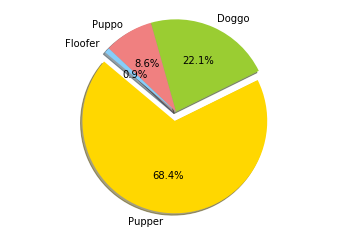

In [127]:
# Data to plot
labels = 'Pupper', 'Doggo', 'Puppo', 'Floofer'
sizes = [223, 72, 28, 3]
colors = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue']
explode = (0.1, 0, 0, 0)  # explode 1st slice

# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)

plt.axis('equal')
plt.show()

In [130]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'wrangle_act.ipynb'])

0